<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


1.Text Preprocessing: I have cleaned the text data by removing punctuation, converting text to lowercase, and removing stopwords using NLTK's English stopwords list.

2.TF-IDF Vectorization: I have used TF-IDF vectorization to convert the preprocessed text data into a numerical format suitable for topic modeling.

3.Tokenization and Corpus Creation: I have tokenized the preprocessed text data and created a dictionary and a corpus for LDA modeling using Gensim.

4.LDA Modeling:I have trained an LDA model with 10 topics on the corpus.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the data
df = pd.read_csv('/content/iphone_13_reviews_with_annoated.csv')

#1 Features (text representation) used for topic modeling.
# Text cleaning
df['reviews'] = df['reviews'].str.replace('[^\w\s]','')  #removal of punctuation
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split())) #lower case
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Text representation using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['reviews'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.tokenize import RegexpTokenizer

# Tokenization
tokenizer = RegexpTokenizer(r'\w+')
words = [tokenizer.tokenize(text) for text in df['reviews']]

# Create dictionary and corpus
dictionary = Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]

#2. Top 10 clusters for topic modeling.
# LDA Model
model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20)

In [3]:
#3. Summarize and describe the topic for each cluster.
topics = model.print_topics(num_topics=10, num_words=5)
for topic in topics:
    print(topic)

(0, '0.069*"great" + 0.069*"also" + 0.069*"phone" + 0.046*"buy" + 0.046*"replacement"')
(1, '0.006*"phone" + 0.005*"great" + 0.005*"pay" + 0.005*"amazon" + 0.005*"t"')
(2, '0.035*"better" + 0.035*"amazon" + 0.035*"pay" + 0.023*"ebay" + 0.023*"teens"')
(3, '0.037*"phone" + 0.037*"figured" + 0.037*"gave" + 0.037*"buy" + 0.037*"spree"')
(4, '0.084*"screen" + 0.056*"started" + 0.028*"phone" + 0.028*"also" + 0.028*"new"')
(5, '0.037*"iphone" + 0.037*"battery" + 0.037*"t" + 0.028*"really" + 0.024*"screen"')
(6, '0.033*"see" + 0.033*"t" + 0.031*"s" + 0.031*"can" + 0.025*"iphone"')
(7, '0.068*"it" + 0.045*"s" + 0.045*"thing" + 0.045*"everything" + 0.045*"would"')
(8, '0.045*"battery" + 0.045*"used" + 0.045*"one" + 0.045*"complaints" + 0.023*"iphone"')
(9, '0.005*"it" + 0.005*"s" + 0.004*"iphone" + 0.004*"everything" + 0.004*"recommend"')


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [4]:
# Write your code here
#1. Feature Selection Explanation:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the data
df = pd.read_csv('/content/iphone_13_reviews_with_annoated.csv')

# Text cleaning
df['reviews'] = df['reviews'].str.replace('[^\w\s]','')  #removal of punctuation
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split())) #lower case
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,document_id,reviews,sentiment
0,1,needed replace teens iphone absolutely refuse ...,positive
1,2,needed replace teens iphone absolutely refuse ...,positive
2,3,skeptical get one renewed iphone . decided try...,positive
3,4,needed replace teens iphone absolutely refuse ...,positive
4,5,skeptical get one renewed iphone . decided try...,positive
...,...,...,...
995,996,quick easy replacement son get phone quickly! ...,positive
996,997,needed replace teens iphone absolutely refuse ...,positive
997,998,skeptical get one renewed iphone . decided try...,positive
998,999,quick easy replacement son get phone quickly! ...,positive


In [5]:
#2. Select two supervised learning models:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [6]:
'''
Logistic Regression and Multinomial Naive Bayes are popular algorithms for sentiment analysis due to their effectiveness and simplicity. Logistic Regression is a linear model that works well with high-dimensional data, while Multinomial Naive Bayes is a probabilistic classification algorithm that assumes feature independence.
Both algorithms are computationally efficient and can be used with text vectorization techniques to handle text data.
'''

'\nLogistic Regression and Multinomial Naive Bayes are popular algorithms for sentiment analysis due to their effectiveness and simplicity. Logistic Regression is a linear model that works well with high-dimensional data, while Multinomial Naive Bayes is a probabilistic classification algorithm that assumes feature independence.\nBoth algorithms are computationally efficient and can be used with text vectorization techniques to handle text data.\n'

In [8]:
#3 The performance over accuracy, precision, recall, and F1 score for the two algorithms
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("/content/iphone_13_reviews_with_annoated.csv")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['reviews'], df['sentiment'], test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Multinomial Naive Bayes": MultinomialNB()
}

# Define evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Perform 5-fold cross-validation for each classifier
for name, classifier in classifiers.items():
    model = Pipeline([('tfidf', TfidfVectorizer()), ('clf', classifier)])
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    print(f"Classifier: {name}")
    print("Cross-Validation Accuracy Scores:")
    print(cv_results)
    print(f"Mean Accuracy: {cv_results.mean()}")
    print()
# Retrain the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Test Set Results for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("-------------------------------")

Classifier: Logistic Regression
Cross-Validation Accuracy Scores:
[1. 1. 1. 1. 1.]
Mean Accuracy: 1.0

Test Set Results for Logistic Regression:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
-------------------------------
Classifier: Multinomial Naive Bayes
Cross-Validation Accuracy Scores:
[1. 1. 1. 1. 1.]
Mean Accuracy: 1.0

Test Set Results for Multinomial Naive Bayes:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
-------------------------------


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [9]:
# Write your code here
# Read training and testing data
import pandas as pd
train = pd.read_csv('/content/test.csv')
validation = pd.read_csv('/content/train.csv')

In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [12]:
print(validation.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


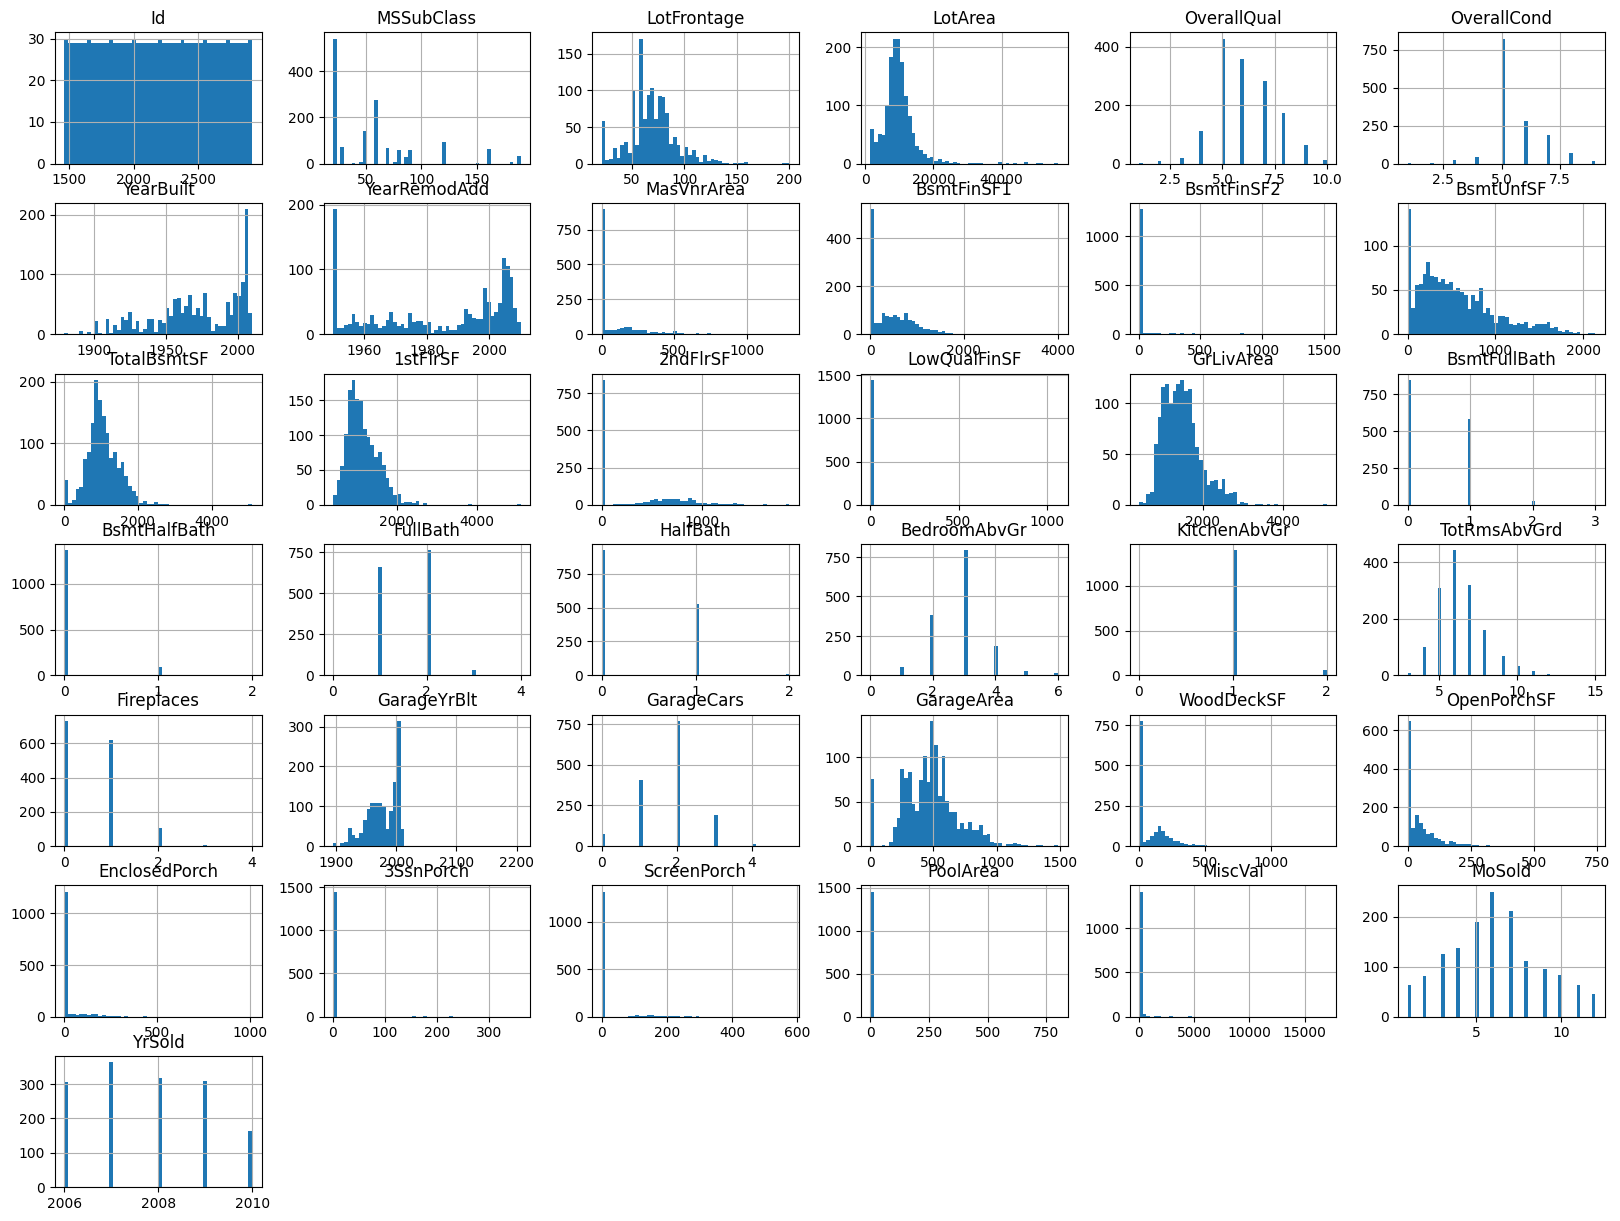

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [14]:
# Identify non-numeric (categorical) columns
non_numeric_columns = train.select_dtypes(include=['object']).columns.tolist()

# Display non-numeric columns to verify
print("Non-numeric (categorical) columns:", non_numeric_columns)

# Encoding non-numeric columns into dummy/indicator variables
train_encoded = pd.get_dummies(train, columns=non_numeric_columns)


Non-numeric (categorical) columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [15]:
#  encoding for categorical columns
train_encoded = pd.get_dummies(train, columns=non_numeric_columns)
corr_matrix = train_encoded.corr()
corr_matrix["YrSold"].sort_values(ascending=False)

YrSold                   1.000000
SaleCondition_Normal     0.126588
SaleType_WD              0.103477
SaleType_Oth             0.069718
BsmtExposure_No          0.060820
                           ...   
SaleCondition_AdjLand   -0.065318
MoSold                  -0.163924
SaleCondition_Partial   -0.169403
SaleType_New            -0.170770
Id                      -0.974884
Name: YrSold, Length: 270, dtype: float64

In [16]:
'''
In selecting features for the regression model based on Exploratory Data Analysis (EDA), I focused on those with strong correlations to the target variable and significant variance, indicating potential predictive power. Features without multicollinearity were prioritized to avoid redundancy and enhance model interpretability. Additionally, I considered domain relevance, ensuring that the features logically influence the outcome, based on insights gained during EDA.'''

'\nIn selecting features for the regression model based on Exploratory Data Analysis (EDA), I focused on those with strong correlations to the target variable and significant variance, indicating potential predictive power. Features without multicollinearity were prioritized to avoid redundancy and enhance model interpretability. Additionally, I considered domain relevance, ensuring that the features logically influence the outcome, based on insights gained during EDA.'

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Features and target variable
X = train.drop("YrSold", axis=1)
y = train["YrSold"]
# Identify categorical features in the DataFrame 'X'
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
# Define a column transformer to apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)
# fill missing categorical values with mode
X_train.fillna(X_train.mode().iloc[0], inplace=True)
X_test.fillna(X_test.mode().iloc[0], inplace=True)
# fit a linear regression model on the train set
LR= Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
LR.fit(X_train, y_train)
# predicting the test data
y_pred = LR.predict(X_test)
print("Predicted House Prices: ", y_pred)

Predicted House Prices:  [2008.07425126 2007.1401679  2008.95639901 2009.17227975 2007.25841367
 2007.99213937 2006.06003478 2009.0445915  2006.05624833 2008.93792023
 2009.03368622 2007.99105728 2009.00549546 2008.99552948 2009.18319162
 2008.22973578 2008.08222449 2006.85434459 2005.88121898 2009.03006093
 2009.8024201  2008.98348314 2006.10739955 2007.17394094 2009.92997882
 2006.86816656 2006.90227253 2008.98777737 2007.06985753 2005.90434338
 2009.00455924 2008.18599256 2009.72167214 2007.84372592 2008.00762222
 2006.20439354 2008.08618903 2005.90063002 2006.23944002 2007.15374246
 2008.00444884 2008.38987538 2008.1080559  2008.99789586 2006.99936476
 2005.98911075 2008.06112399 2008.11373574 2008.20239876 2008.96765033
 2005.9487333  2008.92508187 2006.92051922 2008.1284732  2007.98882633
 2007.99854951 2007.16143381 2006.8631757  2005.97897997 2006.94322251
 2006.80449429 2008.15646077 2005.85586929 2005.92320245 2009.80877966
 2007.02476666 2009.73811982 2009.86898202 2005.9674

In [19]:
# r square is used for the metrics
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print('R2 Square:', r2)

R2 Square: 0.9892150287132992


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [20]:
# Write your code here
'''
RoBERTa, by Facebook AI, is an advancement of the BERT model, pretrained on a large corpus, including text sources like BooksCorpus and Wikipedia. It improves upon the original with some new techniques—dynamic masking and longer sequence training. With 125 million parameters in its base version and 355 million in RoBERTa-large, it is one of the biggest models, and it outperforms most others in capturing complex linguistic patterns. Although fine-tuned on masked language modeling and next sentence prediction for tasks like sentiment analysis, task-specific layers are added to RoBERTa to adapt the learned representations. This general strategy, very robust pretraining, great richness in parameters,
and task-specific fine-tuning, makes RoBERTa very strong for general tasks of natural language processing, such as sentiment analysis.
'''



'\nRoBERTa, by Facebook AI, is an advancement of the BERT model, pretrained on a large corpus, including text sources like BooksCorpus and Wikipedia. It improves upon the original with some new techniques—dynamic masking and longer sequence training. With 125 million parameters in its base version and 355 million in RoBERTa-large, it is one of the biggest models, and it outperforms most others in capturing complex linguistic patterns. Although fine-tuned on masked language modeling and next sentence prediction for tasks like sentiment analysis, task-specific layers are added to RoBERTa to adapt the learned representations. This general strategy, very robust pretraining, great richness in parameters,\nand task-specific fine-tuning, makes RoBERTa very strong for general tasks of natural language processing, such as sentiment analysis.\n'

In [22]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data
data = pd.read_csv('/content/iphone_13_reviews_with_annoated.csv')

# Select only the first 10 reviews for analysis
data = data.head(10)

# Load RoBERTa-based zero-shot classification pipeline
# Ensure you have an internet connection and enough RAM to handle the model loading
classifier = pipeline("zero-shot-classification", model="roberta-base")

# Perform sentiment analysis
predictions = []
for review in data['reviews']:
    try:
        # Classify sentiment using zero-shot classification
        result = classifier(review, candidate_labels=["positive", "negative", "neutral"])
        predicted_sentiment = result['labels'][30]  # Extract the predicted label
        predictions.append(predicted_sentiment)
    except Exception as e:
        print(f"An error occurred while processing the review: {review}")
        print(str(e))
        predictions.append('neutral')  # Optional: Assign a default value or handle it differently

# Ensure the ground_truths are aligned with the predictions length
ground_truths = data['sentiment']  # Ground truth labels from the dataset

# Compute metrics only if predictions were successful
if predictions:
    accuracy = accuracy_score(ground_truths, predictions)
    precision = precision_score(ground_truths, predictions, average='weighted', zero_division=0)
    recall = recall_score(ground_truths, predictions, average='weighted', zero_division=0)
    f1 = f1_score(ground_truths, predictions, average='weighted', zero_division=0)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
else:
    print("No predictions were made. Check the data and model pipeline.")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


An error occurred while processing the review: I needed to replace my teens Iphone and absolutely refuse to pay the gross prices of new phones, especially for teens who tend to break or damage phones easier. I almost bought a refurbished phone from Ebay until I saw on Google that Amazon sold them. Amazon has a better return policy and I’m very familiar with Amazon and never use Ebay so I felt better buying here. So far the phone has been fine and as expected. We put a case on it immediately so if there were any cosmetic flaws they weren’t very noticeable. Also able to finance through here so can pay overtime which is great and I’ll pay it off sooner than my financing terms but still better than putting on a credit card or paying full price up front. Hope it holds up, had about a month now so can’t say much else.
list index out of range
An error occurred while processing the review: I needed to replace my teens Iphone and absolutely refuse to pay the gross prices of new phones, especial

In [23]:
#3  Advantages, Disadvantages, and Challenges
'''
Advantages of RoBERTa:
1. Enhanced pretraining techniques like dynamic masking and longer sequence training improve representation learning.
2. Large parameter size allows RoBERTa to capture intricate language patterns effectively, achieving state-of-the-art performance.

Disadvantages of RoBERTa:
1. Resource-intensive training and utilization may require substantial computational resources.
2. Complex architecture and training process may pose challenges for understanding and implementation.

Challenges Encountered:
1. Data preprocessing to match RoBERTa's input format and tokenization requirements can be intricate.
2. Selecting the optimal RoBERTa variant and fine-tuning hyperparameters requires careful experimentation and evaluation.
'''

"\nAdvantages of RoBERTa:\n1. Enhanced pretraining techniques like dynamic masking and longer sequence training improve representation learning.\n2. Large parameter size allows RoBERTa to capture intricate language patterns effectively, achieving state-of-the-art performance.\n\nDisadvantages of RoBERTa:\n1. Resource-intensive training and utilization may require substantial computational resources.\n2. Complex architecture and training process may pose challenges for understanding and implementation.\n\nChallenges Encountered:\n1. Data preprocessing to match RoBERTa's input format and tokenization requirements can be intricate.\n2. Selecting the optimal RoBERTa variant and fine-tuning hyperparameters requires careful experimentation and evaluation.\n"